In [ ]:

!pip install biopython

# Exploring Biopython Documentation

Biopython provides extensive documentation that serves as a valuable resource for understanding its modules, functions, and usage. Here's a step-by-step guide on how to explore the documentation for a specific module, using the `Bio.Seq` module as an example:

1. **Visit the Documentation:**
   - Go to the [Biopython Documentation](https://biopython.org/wiki/Documentation).
   - Navigate to the "Biopython API" section.

2. **Locate the `Bio.Seq` Module:**
 
3. **Explore Module Functions:**
   - Click on the `Bio.Seq` module link to access its documentation.
   - Explore the functions provided by the module, such as `Seq()`, `translate()`, etc.

4. **Check Function Parameters:**
   - Click on a specific function to view its documentation.
   - Check the function's parameters, return values, and usage examples.



In [2]:
# Import the Seq class from Biopython
from Bio.Seq import Seq

# Create a DNA sequence
dna_sequence = Seq("ATCGTAGCTAG")

# Display the sequence
print("DNA Sequence:", dna_sequence)

# Accessing elements of the sequence
print("First base:", dna_sequence[0])
print("Last base:", dna_sequence[-1])

# Slicing the sequence
sub_sequence = dna_sequence[2:6]
print("Sliced sequence:", sub_sequence)

# Concatenation of sequences
concatenated_sequence = dna_sequence + Seq("GATTACA")
print("Concatenated sequence:", concatenated_sequence)


DNA Sequence: ATCGTAGCTAG
First base: A
Last base: G
Sliced sequence: CGTA
Concatenated sequence: ATCGTAGCTAGGATTACA


- Import the `Seq` class from `Bio.Seq` to work with biological sequences.
- Create a DNA sequence and display it.
- Access individual bases of the sequence and demonstrate slicing.
- Concatenate sequences to show how it can be done with Biopython.


In [3]:
# Transcribe DNA to RNA
rna_sequence = dna_sequence.transcribe()
print("RNA Sequence:", rna_sequence)

# Translate RNA to protein
protein_sequence = rna_sequence.translate()
print("Protein Sequence:", protein_sequence)

RNA Sequence: AUCGUAGCUAG
Protein Sequence: IVA


/home/dmm2017/miniconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


- Use the `transcribe()` method to convert DNA to RNA.
- Use the `translate()` method to convert RNA to protein.
- Discuss the concept of transcription and translation in biological processes.


In [6]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Create a SeqRecord with a specific identifier and description
record = SeqRecord(Seq("ATCGTAGCTAG"), id="sequence_1", description="Example DNA sequence")

# Write the SeqRecord to a FASTA file
SeqIO.write(record, "example.fasta", "fasta")
print("Sequence written to example.fasta")

# Read sequences from the FASTA file
fasta_sequences = SeqIO.parse("example.fasta", "fasta")
for record in fasta_sequences:
    print("Read sequence from file:")
    print("ID:", record.id)
    print("Description:", record.description)
    print("Sequence:", record.seq)


Sequence written to example.fasta
Read sequence from file:
ID: sequence_1
Description: sequence_1 Example DNA sequence
Sequence: ATCGTAGCTAG


- Import `SeqIO` from Biopython for reading and writing sequence files.
- Write the DNA sequence to a FASTA file using `SeqIO.write`.
- Read sequences from the saved FASTA file using `SeqIO.parse` and print them.


In [7]:
from Bio import Entrez

# Provide your email address to identify yourself to NCBI
Entrez.email = "your_email@example.com"

# Fetch data from NCBI using accession number
accession_number = "NM_001301717"  # Example accession number
handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text")
genbank_record = SeqIO.read(handle, "genbank")
handle.close()

# Display information from the GenBank record
print("Accession:", genbank_record.id)
print("Description:", genbank_record.description)
print("Sequence length:", len(genbank_record.seq))


Accession: NM_001301717.2
Description: Homo sapiens C-C motif chemokine receptor 7 (CCR7), transcript variant 4, mRNA
Sequence length: 2191


- Import `Entrez` module for accessing NCBI databases.
- Set your email address to identify yourself to NCBI.
- Use `Entrez.efetch` to retrieve a GenBank record by accession number.
- Read the GenBank record using `SeqIO.read` and display relevant information.


In [6]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

seq1 = Seq("ATCGTAGCTAG")
seq2 = Seq("ATCGTACCTAG")

# Define custom scoring matrix for matches and mismatches
match_score = 2
mismatch_penalty = -1
gap_penalty = -0.5

# Perform pairwise sequence alignment with custom scoring
alignments_custom = pairwise2.align.globalms(seq1, seq2, match_score, mismatch_penalty, gap_penalty, gap_penalty, one_alignment_only=True)

# Display the alignment result with custom scoring
alignment_custom = alignments_custom[0]
print("Aligned Sequence 1:", alignment_custom.seqA)
print("Aligned Sequence 2:", alignment_custom.seqB)
print("Alignment Score with Custom Scoring:", alignment_custom.score)
print("")
print("BLAST-type alignment")
for a in alignments_custom:
    print(format_alignment(*a))


Aligned Sequence 1: ATCGTAGC-TAG
Aligned Sequence 2: ATCGTA-CCTAG
Alignment Score with Custom Scoring: 19.0
BLAST-type alignment
ATCGTAGC-TAG
|||||| | |||
ATCGTA-CCTAG
  Score=19


- Create two DNA sequences for alignment.
- Define a custom scoring matrix with match score, mismatch penalty, and gap penalty.
- Use `pairwise2.align.globalms` for global alignment with custom scoring.
- Display the aligned sequences and the alignment score with custom scoring.


In [15]:
from Bio.PDB import PDBParser

# Download a sample PDB file (e.g., hemoglobin structure)
pdb_url = "https://files.rcsb.org/download/6YYT.pdb"
pdb_filename = "6YYT.pdb"

import urllib.request
urllib.request.urlretrieve(pdb_url, pdb_filename)
print(f"Downloaded PDB file: {pdb_filename}")

# Parse the PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("Hemoglobin", pdb_filename)

# Display information about the structure
print("Structure ID:", structure.id)
print("Number of models:", len(structure))
print("Number of chains:", len(list(structure[0])))


Downloaded PDB file: 6YYT.pdb
Structure ID: Hemoglobin
Number of models: 1
Number of chains: 8


In [ ]:
!pip install nglview

- Import `PDBParser` from Biopython for parsing PDB files.
- Download a sample PDB file from the RCSB PDB database (replace the URL if needed).
- Parse the PDB file using the `PDBParser` and display basic information about the structure.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 4.4 MB/s eta 0:00:00


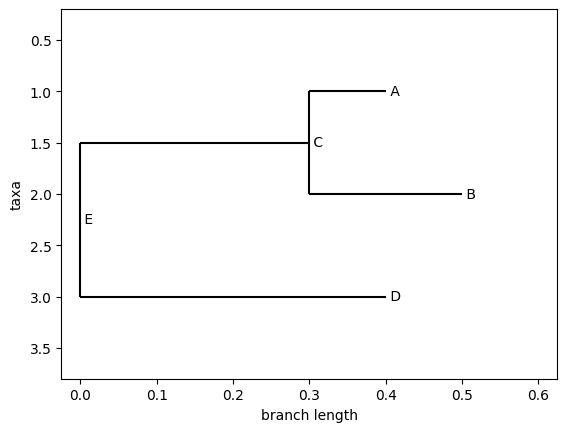

In [22]:
!pip install matplotlib
from Bio import Phylo
from io import StringIO


# Create a basic Newick format string for a small tree
newick_tree = "((A:0.1,B:0.2)C:0.3,D:0.4)E;"
handle = StringIO(newick_tree)
# Parse the Newick format tree
tree = Phylo.read(handle, "newick")

# Draw the phylogenetic tree
Phylo.draw(tree)


    A, B, C, and D are taxa (leaves of the tree).
    The numbers after the colon represent branch lengths.
    The parentheses indicate the relationships and branching patterns.

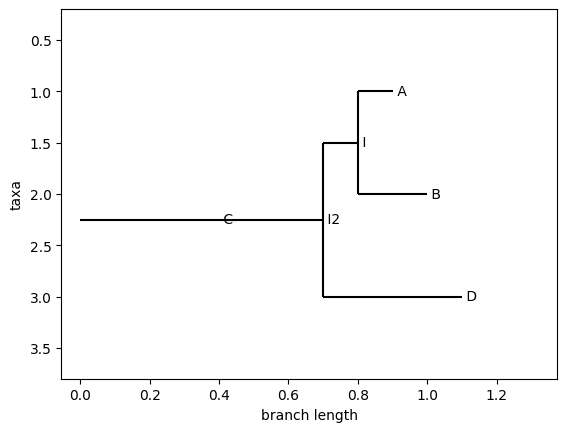

In [28]:
from Bio import Phylo

# Create Clade objects for leaves
A = Phylo.BaseTree.Clade(name="A", branch_length=0.1)
B = Phylo.BaseTree.Clade(name="B", branch_length=0.2)
C = Phylo.BaseTree.Clade(name="C", branch_length=0.3)
D = Phylo.BaseTree.Clade(name="D", branch_length=0.4)

# Create internal nodes and the root node
internal_node_1 = Phylo.BaseTree.Clade(name = "I", branch_length=0.1, clades=[A, B])
internal_node_2 = Phylo.BaseTree.Clade(name = "I2", branch_length=0.3, clades=[internal_node_1, D])
root_node = Phylo.BaseTree.Clade(name = "C", branch_length=0.4, clades=[internal_node_2])

# Create the Tree object
tree = Phylo.BaseTree.Tree(root_node)

# Draw the phylogenetic tree
Phylo.draw(tree)

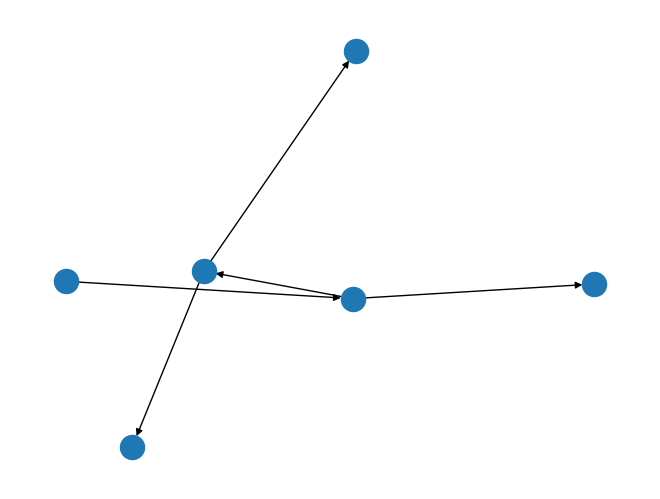

In [33]:
!pip install networkx
import networkx
net = Phylo.to_networkx(tree)
networkx.draw(net)

# Exercise: DNA Sequence Motif Search
Problem Statement:

You are given a DNA sequence and a motif. Your task is to write a Python function that finds all occurrences of the motif within the DNA sequence. Additionally, the function should return the positions (indices) of the motif in the DNA sequence.

Write a Python function named find_motif with the following signature:

In [ ]:
def find_motif(dna_sequence, motif):
    """
    Find all occurrences of a motif in a DNA sequence.

    Parameters:
    - dna_sequence (str): The input DNA sequence.
    - motif (str): The motif to search for.

    Returns:
    - List of integers: Positions (indices) of motif occurrences in the DNA sequence.
    """
    # Your implementation here
    pass



In [ ]:
# Example usage
dna_sequence = "ATGCTATGATGCTATG"
motif = "ATG"

# Expected output: [0, 6, 12]
positions = find_motif(dna_sequence, motif)
print("Motif positions:", positions)


Please check BioPython documentation and come up with easy and effective solution